In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('max_rows', 6)  # max number of rows to show in this notebook — to save space!
import seaborn as sns  # for better style in plots

# 1D analysis: `pandas`!

For 1D analysis, we are generally thinking about data that varies in time, so time series analysis. The `pandas` package is particularly suited to deal with this type of data, particularly having very convenient methods for interpreted, searching through, and using time representations.

Let's start with the example we started the class with: taxi rides in New York City.

In [47]:
df = pd.read_csv('../data/yellow_tripdata_2016-05-01_decimated.csv', header=0, parse_dates=[0, 2], index_col=[0])

What do all these (and other) input keyword arguments do?

* header: tells which row of the data file is the header, from which it will extract column names
* parse_dates: try to interpret the values in `[col]` or `[[col1, col2]]` as dates, to convert them into `datetime` objects.
* index_col: if no index column is given, an index counting from 0 is given to the rows. By inputting `index_col=[column integer]`, that column will be used as the index instead. This is usually done with the time information for the dataset.
* skiprows: can skip specific rows, `skiprows=[row number list]`, or number of rows to skip, `skiprows=[number of rows integer]`.


In [46]:
df

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,1,2016-05-01 00:17:00,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0,0.3,17.80
2016-05-01 00:00:00,2,2016-05-01 00:00:00,2,18.41,-73.781059,40.645020,2,N,-73.984573,40.768398,2,52.0,0.0,0.5,0.00,0,0.3,52.80
2016-05-01 00:00:00,2,2016-05-01 00:08:00,1,1.60,-74.002769,40.728619,1,N,-73.984161,40.737438,1,8.0,0.5,0.5,1.86,0,0.3,11.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-01 23:59:00,1,2016-05-02 00:38:00,2,19.80,-73.789543,40.647316,2,N,-74.000298,40.744408,1,52.0,0.0,0.5,6.00,0,0.3,58.80
2016-05-01 23:59:00,1,2016-05-02 00:05:00,1,0.50,-73.984489,40.760044,1,N,-73.988449,40.764175,2,5.5,0.5,0.5,0.00,0,0.3,6.80
2016-05-01 23:59:00,2,2016-05-02 00:13:00,1,4.05,-73.989357,40.758759,1,N,-73.949982,40.805481,1,14.5,0.5,0.5,2.20,0,0.3,18.00


We can check to make sure the date/time information has been read in as the index:

In [ ]:
df.index

From this we see that the index is indeed using the timing information in the file, and we can see that the `dtype` is `datetime`.

We can now access the file information using keyword arguments, like so:

In [48]:
df['trip_distance']

tpep_pickup_datetime
2016-05-01 00:00:00     3.60
2016-05-01 00:00:00    18.41
2016-05-01 00:00:00     1.60
                       ...  
2016-05-01 23:59:00    19.80
2016-05-01 23:59:00     0.50
2016-05-01 23:59:00     4.05
Name: trip_distance, dtype: float64

We can plot in this way, too:

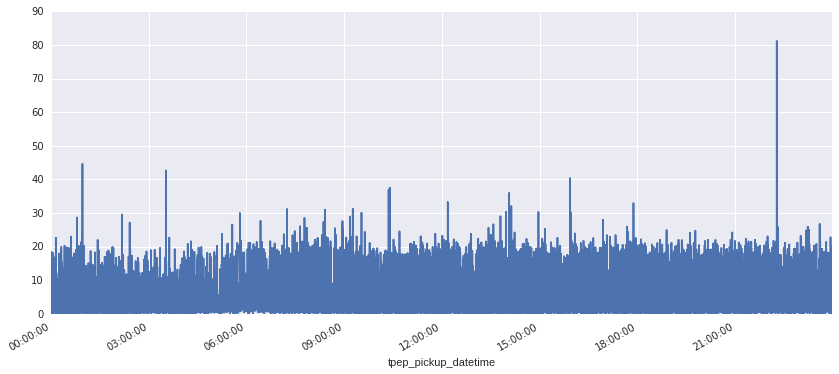

In [49]:
df['trip_distance'].plot(figsize=(14,6))

One of the biggest benefits of using `pandas` is being able to easily reference the data in intuitive ways. For example, because we set up the index of the dataframe to be the date, we can pull out data using dates. In the following, we pull out all data from the first hour of the day:

In [16]:
df['2016-05-01 00']

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,1,2016-05-01 00:17:00,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0,0.3,17.80
2016-05-01 00:00:00,2,2016-05-01 00:00:00,2,18.41,-73.781059,40.645020,2,N,-73.984573,40.768398,2,52.0,0.0,0.5,0.00,0,0.3,52.80
2016-05-01 00:00:00,2,2016-05-01 00:08:00,1,1.60,-74.002769,40.728619,1,N,-73.984161,40.737438,1,8.0,0.5,0.5,1.86,0,0.3,11.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-01 00:59:00,1,2016-05-01 01:09:00,2,2.30,-73.999451,40.728214,1,N,-73.997505,40.745892,2,9.0,0.5,0.5,0.00,0,0.3,10.30
2016-05-01 00:59:00,2,2016-05-01 01:14:00,5,3.58,-74.001373,40.761669,1,N,-73.967537,40.791241,1,14.5,0.5,0.5,3.16,0,0.3,18.96
2016-05-01 00:59:00,2,2016-05-01 01:08:00,1,1.70,-73.986198,40.752426,1,N,-74.003548,40.740318,1,8.0,0.5,0.5,2.79,0,0.3,12.09


Here we further subdivide to examine the passenger count during that time period:

In [22]:
df['2016-05-01 00']['passenger_count']

tpep_pickup_datetime
2016-05-01 00:00:00    1
2016-05-01 00:00:00    2
2016-05-01 00:00:00    1
                      ..
2016-05-01 00:59:00    2
2016-05-01 00:59:00    5
2016-05-01 00:59:00    1
Name: passenger_count, dtype: int64

---
###  *Exercise*

> Figure out how to access the data from dataframe `df` for the first three hours of the day at once. Plot the tip amount (`tip_amount`) for this time period.

> After you can make a line plot, try making a histogram of the data. Play around with the data range and the number of bins.

---

We can change many `plot` parameters directly from `pandas`. We can do this in our exercise plot.

We can add data to our dataframe very easily. Below we add an index that gives the minute in the hour throughout the day.

We now can use the values from the key `minute` to FIXcompute the daily river flow average over all of the years — one of the questions on the homework (for the grad students). We access the data in the dataframe, `groupby` the day of the year (spanning all of the years), and then compute the mean.

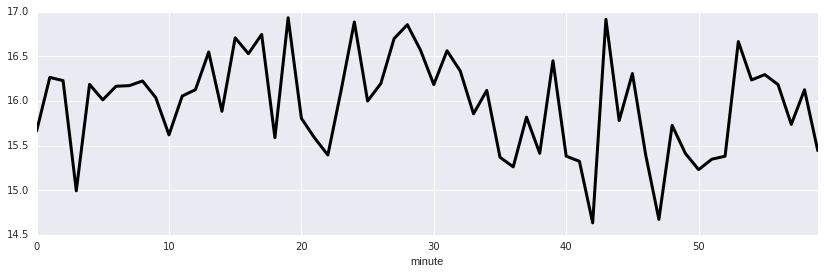

In [42]:
df.loc[:, 'minute'] = df.index.minute  # adding a field for the minute of the hour
df.groupby('minute').aggregate(np.mean)['total_amount'].plot(color='k', grid=True, figsize=(14, 4), lw=3)